In [3]:
import warnings
warnings.filterwarnings('ignore')
#导入处理数据包
import numpy as np
import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 


In [4]:
df=pd.read_csv(r'G:\data\train.csv')

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5422 entries, 0 to 5421
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    5422 non-null   object 
 1   season      5422 non-null   int64  
 2   holiday     5422 non-null   int64  
 3   workingday  5422 non-null   int64  
 4   weather     5422 non-null   int64  
 5   temp        5422 non-null   float64
 6   atemp       5422 non-null   float64
 7   humidity    5422 non-null   int64  
 8   windspeed   5422 non-null   float64
 9   casual      5422 non-null   int64  
 10  registered  5422 non-null   int64  
 11  count       5422 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 508.4+ KB
None


In [6]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011/1/1 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011/1/1 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011/1/1 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011/1/1 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011/1/1 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
colNameDict = {
    'season':'季节',
    'holiday':'节假日',
    'workingday':'工作日',
    'weather':'天气',
    'temp':'摄氏温度',
    'atemp':'体感温度',
    'humidity':'湿度', 
    'windspeed':'风速',
    'casual':'非注册用户个数',
    'registered':'注册用户个数',
    'count':'租车总人数'
}

In [8]:
bikeDf = pd.DataFrame(df)

In [9]:
bikeDf.rename(columns = colNameDict,inplace = True)
bikeDf.head()

,datetime,季节,节假日,工作日,天气,摄氏温度,体感温度,湿度,风速,非注册用户个数,注册用户个数,租车总人数
0,2011/1/1 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011/1/1 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011/1/1 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011/1/1 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011/1/1 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
print('删除重复值前大小',bikeDf.shape)

删除重复值前大小 (5422, 12)


In [11]:
# 删除重复销售记录
bikeDf = bikeDf.drop_duplicates()

In [12]:
print('删除重复值后大小',bikeDf.shape)

删除重复值后大小 (5422, 12)


In [13]:
bikeDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5422 entries, 0 to 5421
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  5422 non-null   object 
 1   季节        5422 non-null   int64  
 2   节假日       5422 non-null   int64  
 3   工作日       5422 non-null   int64  
 4   天气        5422 non-null   int64  
 5   摄氏温度      5422 non-null   float64
 6   体感温度      5422 non-null   float64
 7   湿度        5422 non-null   int64  
 8   风速        5422 non-null   float64
 9   非注册用户个数   5422 non-null   int64  
 10  注册用户个数    5422 non-null   int64  
 11  租车总人数     5422 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 550.7+ KB


拆分年月日

In [14]:
#获取日期
def getday(x):
    return x.split()[0]
#使用datatime的apply函数获取日期
bikeDf['日期'] = bikeDf.datetime.apply(getday)

bikeDf['日期'].head()

0    2011/1/1
1    2011/1/1
2    2011/1/1
3    2011/1/1
4    2011/1/1
Name: 日期, dtype: object

In [15]:
#获取时间
def get_hour(x):
    hour = x.split()[1].split(':')[0]
    return hour
#使用datatime的apply函数获取小时数
bikeDf['时刻']= bikeDf.datetime.apply(get_hour)
bikeDf['时刻'].head()

0    0
1    1
2    2
3    3
4    4
Name: 时刻, dtype: object

In [16]:
#定义获取星期数的函数
def get_weekday(x):
    dateStr = x.split()[0]
    dateDT = datetime.datetime.strptime(dateStr,'%Y/%m/%d')
    week_day = dateDT.weekday()
    return week_day

In [17]:
#获取星期数
bikeDf['星期'] =bikeDf.datetime.apply(get_weekday)
bikeDf['星期'].head()

0    5
1    5
2    5
3    5
4    5
Name: 星期, dtype: int64

In [18]:
#定义获取月份的函数
def get_month(x):
    dateStr = x.split()[0]#取字符串，默认使用空格分隔，取第0个部分，就是取前面的日期
    dateDT = datetime.datetime.strptime(dateStr,'%Y/%m/%d')
    month = dateDT.month
    return month
#获取月份数
bikeDf['月份'] = bikeDf.datetime.apply(get_month)
bikeDf['月份'].head()

0    1
1    1
2    1
3    1
4    1
Name: 月份, dtype: int64

In [19]:
bikeDf.head(10)

,datetime,季节,节假日,工作日,天气,摄氏温度,体感温度,湿度,风速,非注册用户个数,注册用户个数,租车总人数,日期,时刻,星期,月份
0,2011/1/1 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011/1/1,0,5,1
1,2011/1/1 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011/1/1,1,5,1
2,2011/1/1 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011/1/1,2,5,1
3,2011/1/1 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011/1/1,3,5,1
4,2011/1/1 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011/1/1,4,5,1
5,2011/1/1 5:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011/1/1,5,5,1
6,2011/1/1 6:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011/1/1,6,5,1
7,2011/1/1 7:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011/1/1,7,5,1
8,2011/1/1 8:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011/1/1,8,5,1
9,2011/1/1 9:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011/1/1,9,5,1


In [20]:
bikeDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5422 entries, 0 to 5421
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  5422 non-null   object 
 1   季节        5422 non-null   int64  
 2   节假日       5422 non-null   int64  
 3   工作日       5422 non-null   int64  
 4   天气        5422 non-null   int64  
 5   摄氏温度      5422 non-null   float64
 6   体感温度      5422 non-null   float64
 7   湿度        5422 non-null   int64  
 8   风速        5422 non-null   float64
 9   非注册用户个数   5422 non-null   int64  
 10  注册用户个数    5422 non-null   int64  
 11  租车总人数     5422 non-null   int64  
 12  日期        5422 non-null   object 
 13  时刻        5422 non-null   object 
 14  星期        5422 non-null   int64  
 15  月份        5422 non-null   int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 720.1+ KB


异常值处理

In [21]:
bikeDf.describe()
#描述指标：查看出“”值不能小于0

,季节,节假日,工作日,天气,摄氏温度,体感温度,湿度,风速,非注册用户个数,注册用户个数,租车总人数,星期,月份
count,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000
mean,2.511988,0.026558,0.682036,1.426411,19.751988,23.157086,63.405017,12.924144,28.737920,115.485430,144.223349,3.021579,6.538547
std,1.114603,0.160804,0.465728,0.647407,7.951694,8.619132,19.780518,8.354137,39.554419,108.847868,133.312123,1.997622,3.438163
min,1.000000,0.000000,0.000000,1.000000,2.460000,3.030000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.120000,15.910000,49.000000,7.001500,3.000000,27.000000,32.000000,1.000000,4.000000
50%,3.000000,0.000000,1.000000,1.000000,19.680000,23.485000,64.000000,12.998000,13.000000,91.000000,111.000000,3.000000,7.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,79.000000,19.001200,38.000000,168.000000,210.000000,5.000000,10.000000
max,4.000000,1.000000,1.000000,3.000000,38.540000,43.940000,100.000000,56.996900,272.000000,567.000000,638.000000,6.000000,12.000000


In [22]:
#相关性矩阵
corrDf = bikeDf.corr() 
corrDf

,季节,节假日,工作日,天气,摄氏温度,体感温度,湿度,风速,非注册用户个数,注册用户个数,租车总人数,星期,月份
季节,1.000000,0.047625,-0.020374,-0.020890,0.293761,0.306060,0.199296,-0.171031,0.139547,0.227448,0.227113,0.000588,0.971441
节假日,0.047625,1.000000,-0.241914,0.029408,0.003828,-0.003093,0.001779,-0.018954,0.083402,-0.017273,0.010643,-0.139608,0.022171
工作日,-0.020374,-0.241914,1.000000,0.023329,0.034937,0.033187,-0.023743,-0.008550,-0.336007,0.115006,-0.005793,-0.723080,-0.008127
天气,-0.020890,0.029408,0.023329,1.000000,-0.046630,-0.047620,0.401915,0.040354,-0.126913,-0.118076,-0.134063,-0.022521,-0.021226
摄氏温度,0.293761,0.003828,0.034937,-0.046630,1.000000,0.992281,-0.044342,0.004048,0.498356,0.370767,0.450592,-0.052187,0.293355
体感温度,0.306060,-0.003093,0.033187,-0.047620,0.992281,1.000000,-0.023609,-0.039005,0.496926,0.368365,0.448206,-0.052540,0.304561
湿度,0.199296,0.001779,-0.023743,0.401915,-0.044342,-0.023609,1.000000,-0.293854,-0.280382,-0.243601,-0.282089,-0.010086,0.193185
风速,-0.171031,-0.018954,-0.008550,0.040354,0.004048,-0.039005,-0.293854,1.000000,0.075792,0.073080,0.082157,0.006903,-0.172984
非注册用户个数,0.139547,0.083402,-0.336007,-0.126913,0.498356,0.496926,-0.280382,0.075792,1.000000,0.506306,0.710098,0.237846,0.126164
注册用户个数,0.227448,-0.017273,0.115006,-0.118076,0.370767,0.368365,-0.243601,0.073080,0.506306,1.000000,0.966713,-0.084932,0.234703


In [23]:
%matplotlib inline
#导入可视化包
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})

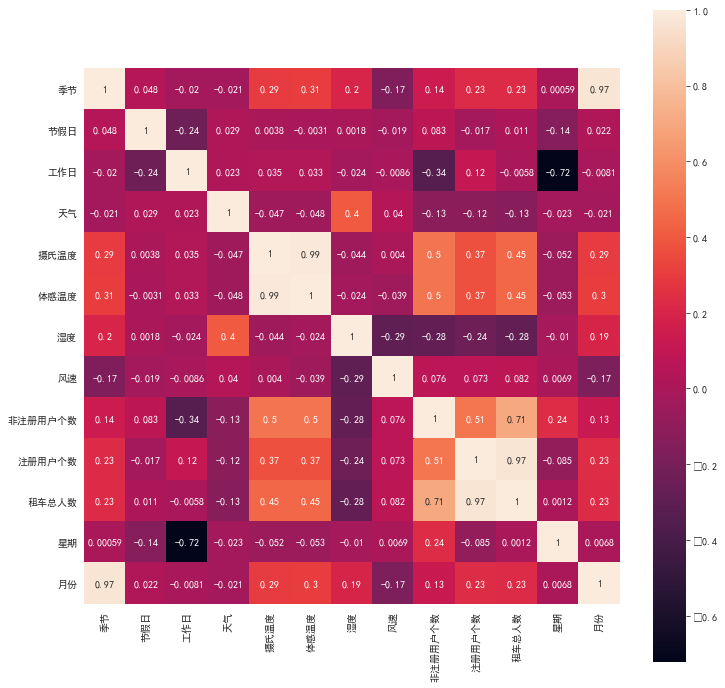

In [24]:
#定义一个图形
fig = plt.figure(figsize = (12,12))
sns.heatmap(corrDf,vmax = 1,square = True,annot=True)

In [25]:
#特征选择
full_X = pd.concat([bikeDf['季节'],
                   bikeDf['节假日'],
                   bikeDf['工作日'],
                   bikeDf['天气'],
                   bikeDf['摄氏温度'],
                   bikeDf['体感温度'],
                   bikeDf['时刻'],
                   bikeDf['星期'],
                   bikeDf['月份'],
                   bikeDf['湿度'],
                   bikeDf['风速'],
                   bikeDf['非注册用户个数'],
                   bikeDf['注册用户个数'],
                   bikeDf['租车总人数'],
                      ],axis=1 )
full_X.head()

,季节,节假日,工作日,天气,摄氏温度,体感温度,时刻,星期,月份,湿度,风速,非注册用户个数,注册用户个数,租车总人数
0,1,0,0,1,9.84,14.395,0,5,1,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,1,5,1,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,2,5,1,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,3,5,1,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,4,5,1,75,0.0,0,1,1


In [26]:
#季节变量离散化
full_X_1 = pd.concat([full_X,bikeDf['租车总人数']],axis=1)
seasonDict={1:'春天',2:'夏天',3:'秋天',4:'冬天'}
full_X_1['season_word']=df['season'].map(seasonDict)
full_X_1.head(2)

,季节,节假日,工作日,天气,摄氏温度,体感温度,时刻,星期,月份,湿度,风速,非注册用户个数,注册用户个数,租车总人数,租车总人数,season_word
0,1,0,0,1,9.84,14.395,0,5,1,81,0.0,3,13,16,16,春天
1,1,0,0,1,9.02,13.635,1,5,1,80,0.0,8,32,40,40,春天


In [27]:
#天气变量离散化
full_X_1 = pd.concat([full_X,bikeDf['租车总人数']],axis=1)
weatherDict={1:'晴天',2:'阴天',3:'小雨或小雪',4:'恶劣天气'}
full_X_1['天气条件']=df['weather'].map(weatherDict)
full_X_1.head(2)

,季节,节假日,工作日,天气,摄氏温度,体感温度,时刻,星期,月份,湿度,风速,非注册用户个数,注册用户个数,租车总人数,租车总人数,天气条件
0,1,0,0,1,9.84,14.395,0,5,1,81,0.0,3,13,16,16,晴天
1,1,0,0,1,9.02,13.635,1,5,1,80,0.0,8,32,40,40,晴天


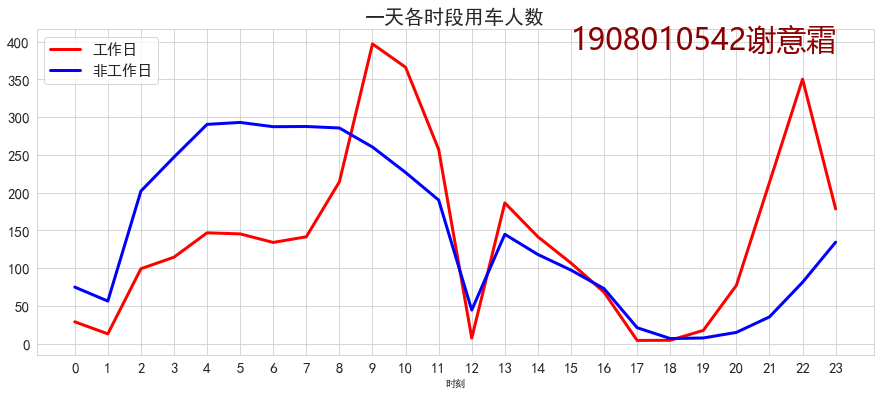

In [28]:
# 时段用车差异
font={'family':'Microsoft Yahei', 'color':'darkred','weight':'normal','size':30}
# 工作日用车情况
plt.figure(figsize=(15,6))
bikeDf[df['workingday']==1].groupby('时刻').mean()['租车总人数'].plot(linestyle = '-',linewidth = 3,color = 'r')
# 非工作日用车情况
bikeDf[df['workingday']==0].groupby('时刻').mean()['租车总人数'].plot(linestyle = '-',linewidth = 3,color = 'b')
plt.xticks(range(24),bikeDf['时刻'],fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['工作日','非工作日'],fontsize=15)
plt.title(u'一天各时段用车人数',fontsize=20)
plt.text(15,390,r'1908010542谢意霜',fontdict=font)
plt.show()

每天上下班时间（8,17时）是两个用车高峰期
除此之外在12-13时是小高峰期，猜测可能是租车出门吃午餐的人

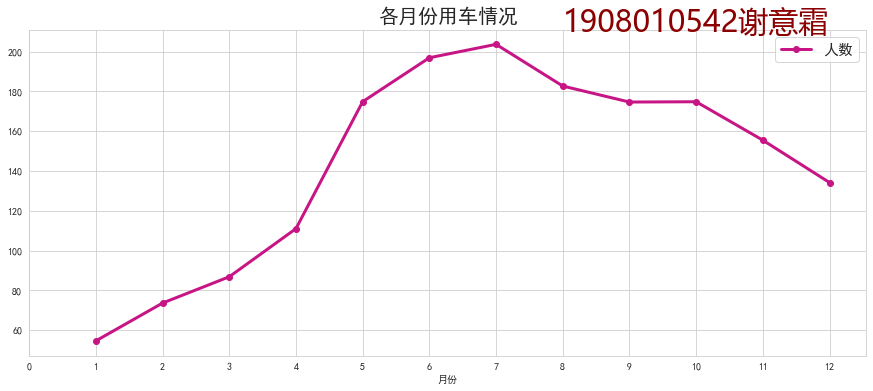

In [29]:
#各月份用车情况
font={'family':'Microsoft Yahei','color':'darkred','weight':'normal', 'size':30}
plt.figure(figsize=(15,6))
bikeDf.groupby('月份').mean()['租车总人数'].plot(marker = 'o',color='#C71585',linewidth = 3)
plt.xticks(range(0,13))
plt.title('各月份用车情况',fontsize=20)
plt.text(8,210,r'1908010542谢意霜',fontdict=font)
plt.legend(['人数'],fontsize=15)
plt.show()

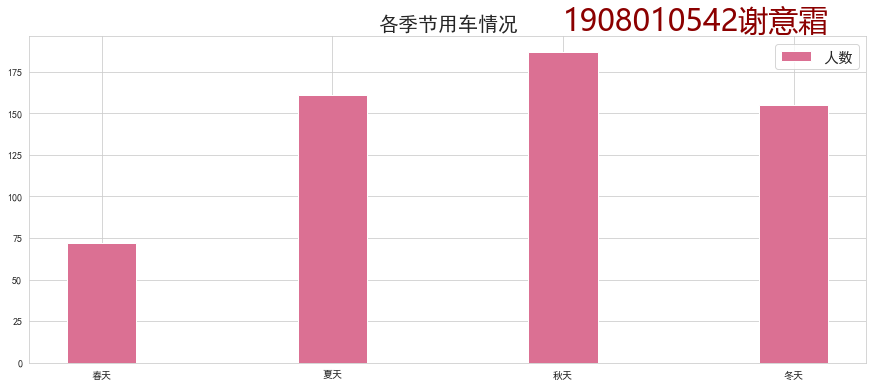

In [30]:
# 各季节用车情况
font={'family':'Microsoft Yahei','color':'darkred', 'weight':'normal','size':30}
plt.figure(figsize=(15,6))
plt.bar(range(4),bikeDf.groupby('季节').mean()['租车总人数'],width=0.3,color='#DB7093')#不同季节的租车人数
plt.xticks(range(4),('春天','夏天','秋天','冬天'))
plt.title('各季节用车情况',fontsize=20)
plt.text(2,200,r'1908010542谢意霜',fontdict=font)
plt.legend(['人数'],fontsize=15)
plt.show()

1-5月租车人数增加，6月达到最高值并趋于稳定，10月租车人数开始下降

[Text(0, 0.5, '租车总人数'), Text(0.5, 0, '天气'), Text(0.5, 1.0, '天气与租车人数箱形图')]

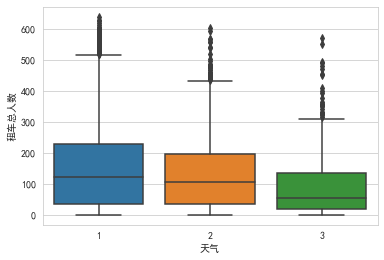

In [31]:
ax3 = fig.add_subplot(4,2,6)
sns.boxplot(data = bikeDf,x= '天气',y = '租车总人数')
ax3.set(ylabel ='租车总人数', xlabel ='天气',title = '天气与租车人数箱形图',)

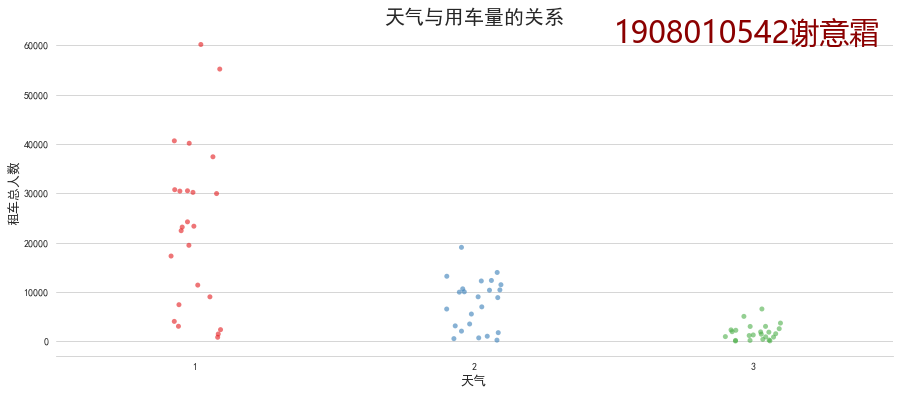

In [32]:
# 天气维度
font={'family':'Microsoft Yahei','color':'darkred','weight':'normal','size':30}
Weather=bikeDf.groupby(['天气','时刻'])[['租车总人数']].sum()#根据天气和时刻进行租车总人数的总和
Weather.reset_index(inplace=True)
plt.figure(figsize=(15,6))
sns.stripplot(x='天气',y='租车总人数',data=Weather,palette='Set1',jitter=True,alpha=0.6)
sns.despine(left=True)
plt.xlabel('天气',fontsize=13)
plt.ylabel('租车总人数',fontsize=13)
plt.title('天气与用车量的关系',fontsize=20)
plt.text(1.5,60500,r'1908010542谢意霜',fontdict=font)
plt.show()

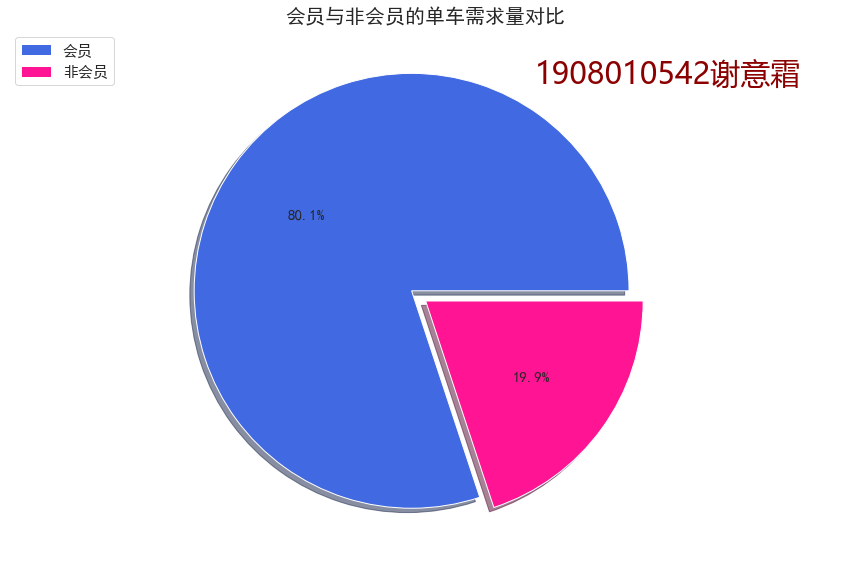

In [37]:
#会员与非会员的单车需求量对比
font={'family':'Microsoft Yahei', 'color':'darkred','weight':'normal', 'size':30}
df_registered = df['registered'].sum() / df['count'].sum()
df_casual = df['casual'].sum() / df['count'].sum()
labels = [df_registered,df_casual]
colors= ['#4169E1','#FF1493']
plt.figure(figsize=(15,10))
plt.axis('equal')
plt.pie(x = labels,colors=colors,autopct = '%.1f%%',textprops = {'fontsize' : 15},explode = [0.08,0],shadow=True)
plt.legend(['会员','非会员'],fontsize=15,loc = 'upper left')
plt.title('会员与非会员的单车需求量对比',fontsize=20)
plt.text(0.5,1,r'1908010542谢意霜',fontdict=font)
plt.show()

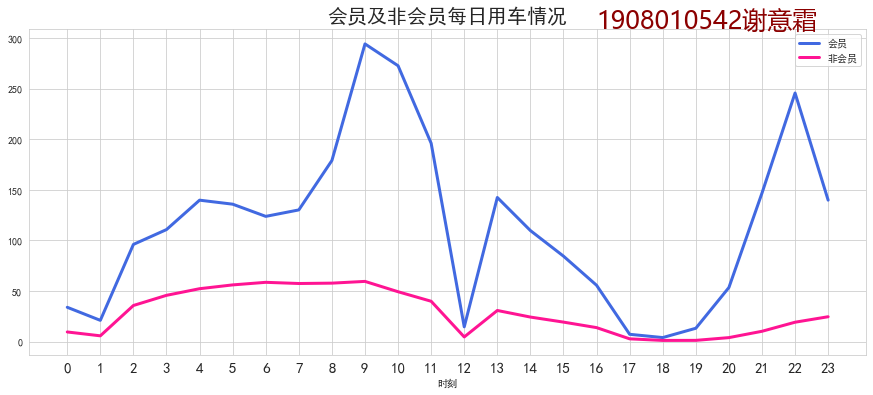

In [36]:
# 会员及非会员每日用车情况
font={'family':'Microsoft Yahei', 'color':'darkred', 'weight':'normal', 'size':25}
df_week_registered = bikeDf.groupby('时刻').mean()['注册用户个数']
df_week_casuual = bikeDf.groupby('时刻').mean()['非注册用户个数']
plt.figure(figsize=(15,6))
df_week_registered.plot(linestyle = '-',linewidth = 3,color = '#4169E1')
df_week_casuual.plot(linestyle = '-',linewidth = 3, color = '#FF1493')
plt.xticks(range(24),bikeDf['时刻'],fontsize=15)
plt.legend(['会员','非会员'])
plt.title('会员及非会员每日用车情况',fontsize=20)
plt.text(16,310,r'1908010542谢意霜',fontdict=font)
plt.show()

由此可见会员用车量比非会员数量多